In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import psycopg2


In [5]:
conn = psycopg2.connect(host = 'localhost', user= 'postgres', password ='123456', dbname= 'ABD')
cursor = conn.cursor()

In [6]:
data=pd.read_sql('''select count(*) as cantidad_de_ingreso,persona.edad as edad,persona.sexo as genero 
from estadisticas_acceso 
inner join persona on estadisticas_acceso.id_persona = persona.id_persona
where ingreso=true
group by edad,sexo
order by cantidad_de_ingreso desc limit 5''',conn)


vista de las top 5 personas que mas entran


In [7]:
print('top 5 personas que mas ingresan')
print(data)

top 5 personas que mas ingresan
   cantidad_de_ingreso  edad     genero
0                    7    61  masculino
1                    6     0   femenino
2                    6    83   femenino
3                    6    48   femenino
4                    5    31  masculino


In [ ]:
vista de porcentaje de ventas a personas con telofono inteligente y sin telefono inteligente

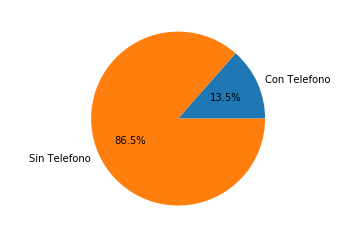

In [12]:
cursor.execute('''select contelf from
(select  count(id_venta) as contelf from venta 
inner join cliente on cliente=id_cliente
where cliente.telf is not null) n1,
(select  count(id_venta) as sintelf from venta 
inner join cliente on cliente=id_cliente
where cliente.telf is  null) n2,
(select  count(id_venta) as total from venta 
inner join cliente on cliente=id_cliente ) n3
''')
contelf = cursor.fetchone()[0]
cursor.execute('''select sintelf from
(select  count(id_venta) as contelf from venta 
inner join cliente on cliente=id_cliente
where cliente.telf is not null) n1,
(select  count(id_venta) as sintelf from venta 
inner join cliente on cliente=id_cliente
where cliente.telf is  null) n2,
(select  count(id_venta) as total from venta 
inner join cliente on cliente=id_cliente ) n3
''')
sintelf = cursor.fetchone()[0]

labels = 'Con Telefono', 'Sin Telefono'
sizes = [contelf,sintelf]
plt.axis('equal')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()





In [ ]:
Lista de Personas con telfono


In [ ]:
data=pd.read_sql('''select * from telf_inteligente''',conn)
print(data)

In [ ]:
Inserte el id_tefl de la persona que desea conocer su recorrido

In [17]:

id = input("inserte el id_telf ")


inserte el id_telf 28


In [ ]:
Imprimir la tabla

In [22]:

data=pd.read_sql("select nombre,piso,fecha_hora from estadisticas_tienda inner join tienda on id_camara=id_tienda where ingreso = true and id_telf ='%s'" % id,conn)
print(data)

           nombre  piso                 fecha_hora
0  planeta sports     1 2019-06-08 21:27:26.106535


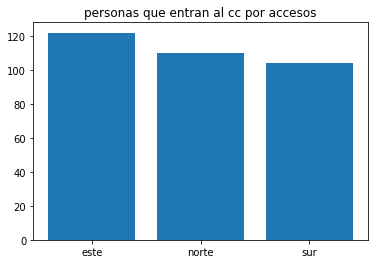

In [24]:
data=pd.read_sql('''select centrocomercial.nombre as nombre_cc,acceso.ubicacion as entrada,count(ingreso) as entraron 
from estadisticas_acceso   
inner join camara_acc on estadisticas_acceso.id_camara=camara_acc.id_camara_acc
inner join acceso on acceso.id_acc=camara_acc.id_acceso
inner join centrocomercial on acceso.cc=centrocomercial.id_cc
where ingreso=true
group by  nombre_cc,entrada''',conn)
plt.bar(data.entrada,data.entraron)
plt.title('personas que entran al cc por accesos')
plt.show()

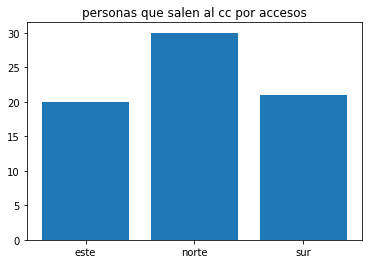

In [26]:
data=pd.read_sql('''select centrocomercial.nombre as nombre_cc,acceso.ubicacion as entrada,count(ingreso) as salieron 
from estadisticas_acceso   
inner join camara_acc on estadisticas_acceso.id_camara=camara_acc.id_camara_acc
inner join acceso on acceso.id_acc=camara_acc.id_acceso
inner join centrocomercial on acceso.cc=centrocomercial.id_cc
where ingreso=false
group by  nombre_cc,entrada''',conn)
plt.bar(data.entrada,data.salieron)
plt.title('personas que salen al cc por accesos')
plt.show()

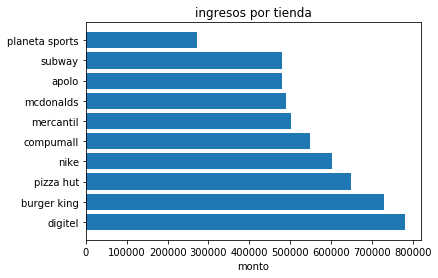

In [33]:
data=pd.read_sql('''select nombre,piso,sum(monto) as vendido from venta 
inner join tienda on tienda.id_tienda=venta.id_tienda
group by tienda.nombre,piso
order by vendido desc''',conn)
fig, ax = plt.subplots()
ax.barh(data.nombre, data.vendido, align='center')
ax.set_title('ingresos por tienda')
ax.set_xlabel('monto')
plt.show()


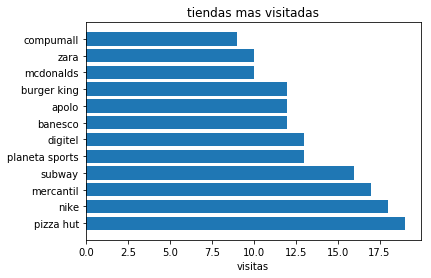

In [9]:
data=pd.read_sql('''select nombre,piso,count(*) as ingresos from estadisticas_tienda 
inner join tienda on tienda.id_tienda=estadisticas_tienda.id_camara
group by tienda.nombre,piso
order by ingresos desc''',conn)
fig, ax = plt.subplots()
ax.barh(data.nombre, data.ingresos, align='center')
ax.set_title('tiendas mas visitadas')
ax.set_xlabel('visitas')
plt.show()


In [ ]:
Clientes que mas han comprado

In [11]:
data=pd.read_sql('''select nombre,cedula,sum(monto) as monto from venta 
inner join cliente on cliente.id_cliente=venta.cliente
group by nombre,cedula
order by monto desc
limit 10''',conn)
print(data)

                nombre    cedula   monto
0         Susana Jones  16931701  361792
1  Jacqueline Davidson  27450312  308784
2          Paul Cortez  15792343   97680
3       Michael Menard  18354056   97366
4        Maria Serrano  27041348   96508
5         Tina Prosser   1847446   94679
6           Gary Moore    642084   94068
7            Mary West  25390197   93605
8        Brian Gardner  27373347   92095
9         Sue Woodward  24569499   91051
